In [ ]:
import pandas as pd
import glob

#  행복지수 데이터 (xls) 불러오기
happiness_df =  pd.read_csv("/content/2015~2024년 행복지수 .csv", encoding='utf-8')

# csv파일을 데이터프레임으로 불러오기
work_hours_df = pd.read_csv("/content/2015~2023 노동시간.csv", encoding='utf-8')

# 국가를 기준으로 병합
merged_df = pd.merge(happiness_df, work_hours_df, on=["Country name", "year"], how="left")  # 'inner' 조인 (행복지수 데이터 기준)

# 결측치가 있는 행 삭제
merged_df = merged_df.dropna()
final_df = merged_df.drop_duplicates()
# 최종 데이터 확인
print(final_df.head())

# 정리된 데이터를 새로운 파일로 저장 (선택)
final_df.to_csv("최종_병합_데이터.csv", index=False)


   Country name     Regional indicator  year  Ladder score  worked hour
50    Australia  North America and ANZ  2015         7.284       1670.0
51    Australia  North America and ANZ  2016         7.313       1660.0
52    Australia  North America and ANZ  2017         7.284       1662.0
53    Australia  North America and ANZ  2018         7.272       1654.0
54    Australia  North America and ANZ  2019         7.228       1651.0


In [ ]:
import pandas as pd
from google.colab import drive

# Google Drive 연결
drive.mount('/content/drive')

# 연도에 따른 파일 이름 리스트 (Google Drive 경로 포함)
files = [
    '/content/drive/MyDrive/2015-1.csv',
    '/content/drive/MyDrive/2016-1.csv',
    '/content/drive/MyDrive/2017-1.csv',
    '/content/drive/MyDrive/2018-1.csv',
    '/content/drive/MyDrive/2019-1.csv',
    '/content/drive/MyDrive/2020-1.csv',
    '/content/drive/MyDrive/2021-1.csv',
    '/content/drive/MyDrive/2022-1.csv',
    '/content/drive/MyDrive/2023-1.csv'
]
years = [2015, 2016, 2017, 2018, 2019,2020,2021,2022,2023]

# 빈 리스트 생성
dataframes = []

# 각 파일을 읽고 연도 정보를 추가
for i, file in enumerate(files):
    df = pd.read_csv(file)  # CSV 파일 읽기
    df['year'] = years[i]   # 연도 추가
    dataframes.append(df)    # DataFrame 리스트에 추가

# 모든 DataFrame을 하나로 결합
merged_df = pd.concat(dataframes, ignore_index=True)

# 결과 출력
print(merged_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Country name  worked hour  year
0       Colombia       2396.0  2015
1         Mexico       2234.0  2015
2     Costa Rica       2148.2  2015
3          Korea       2083.0  2015
4          Chile       1999.0  2015
..           ...          ...   ...
348      Denmark       1380.0  2023
349      Germany       1342.6  2023
350  Netherlands       1413.0  2023
351      Denmark       1380.0  2023
352      Germany       1342.6  2023

[353 rows x 3 columns]


In [ ]:
# merged_df를 CSV 파일로 저장
merged_df.to_csv('/content/연도별 노동시간.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('/content/연도별 노동시간.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv("최종_병합_데이터.csv")

# 중복된 행 제거
data = data.drop_duplicates()

# 2020~2023년 데이터가 모두 있는 국가만 남기기
# 각 국가별로 연도 수를 세고, 4년치 (2020, 2021, 2022, 2023)가 있는 경우만 필터링
filtered_data = data.groupby('Country name').filter(lambda x: x['year'].nunique() == 4)

# 결과 출력
print(filtered_data)

# 정리된 데이터를 새로운 파일로 저장 (선택)
filtered_data.to_csv("정리된_데이터.csv", index=False)


       Country name     Regional indicator  year  Ladder score  upperwhisker  \
0         Australia  North America and ANZ  2020        7.2228      7.304808   
1         Australia  North America and ANZ  2021        7.1835      7.264684   
2         Australia  North America and ANZ  2022        7.1621      7.243522   
3         Australia  North America and ANZ  2023        7.0946      7.179957   
4           Austria         Western Europe  2020        7.2942      7.359596   
..              ...                    ...   ...           ...           ...   
145  United Kingdom         Western Europe  2023        6.7956      6.876984   
146   United States  North America and ANZ  2020        6.9396      7.032340   
147   United States  North America and ANZ  2021        6.9515      7.047040   
148   United States  North America and ANZ  2022        6.9768      7.065357   
149   United States  North America and ANZ  2023        6.8937      6.985669   

     lowerwhisker  Explained by: Log GD

In [ ]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv("/content/노동시간+행복지수.csv",encoding='utf-8')

# 컬럼명 정리 (공백 제거)
df.columns = [col.replace(" ", "_") for col in df.columns]

# 데이터 타입 확인
print(df.dtypes)

# 결측치 확인
print(df.isnull().sum())

# 중복 데이터 확인
print(df.duplicated().sum())

# 기초 통계 확인
print(df.describe())


Country_name                                   object
Regional_indicator                             object
year                                            int64
Ladder_score                                  float64
upperwhisker                                  float64
lowerwhisker                                  float64
Explained_by:_Log_GDP_per_capita              float64
Explained_by:_Social_support                  float64
Explained_by:_Healthy_life_expectancy         float64
Explained_by:_Freedom_to_make_life_choices    float64
Explained_by:_Generosity                      float64
Explained_by:_Perceptions_of_corruption       float64
Dystopia_+_residual                           float64
worked_hour                                   float64
dtype: object
Country_name                                  0
Regional_indicator                            0
year                                          0
Ladder_score                                  0
upperwhisker                          

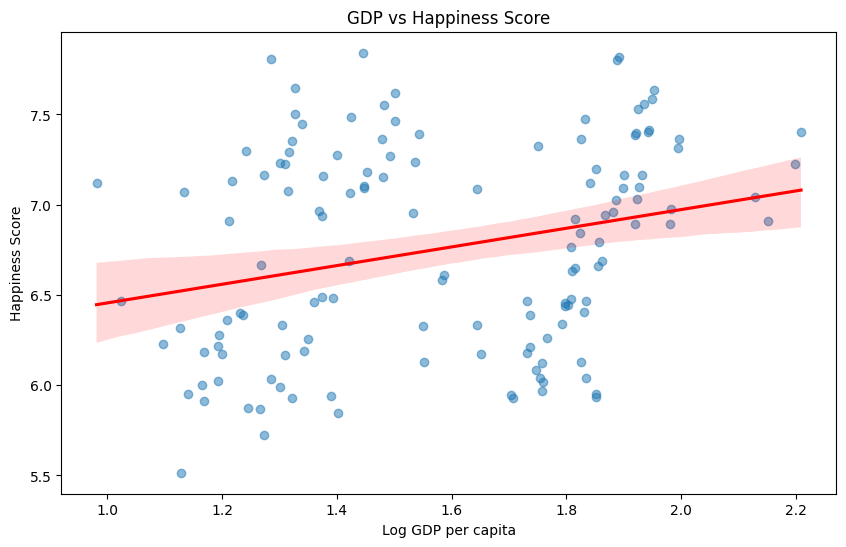

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="Explained_by:_Log_GDP_per_capita", y="Ladder_score",
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("GDP vs Happiness Score")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.show()


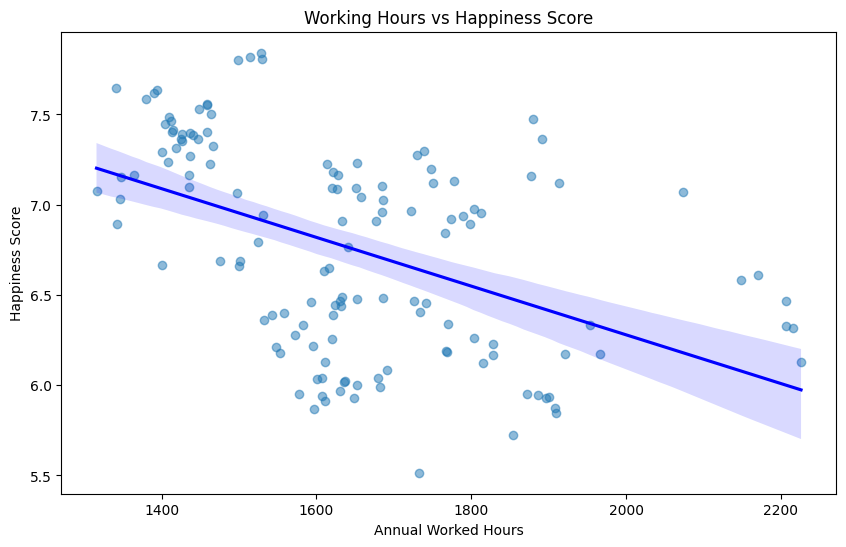

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="worked_hour", y="Ladder_score",
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'})
plt.title("Working Hours vs Happiness Score")
plt.xlabel("Annual Worked Hours")
plt.ylabel("Happiness Score")
plt.show()

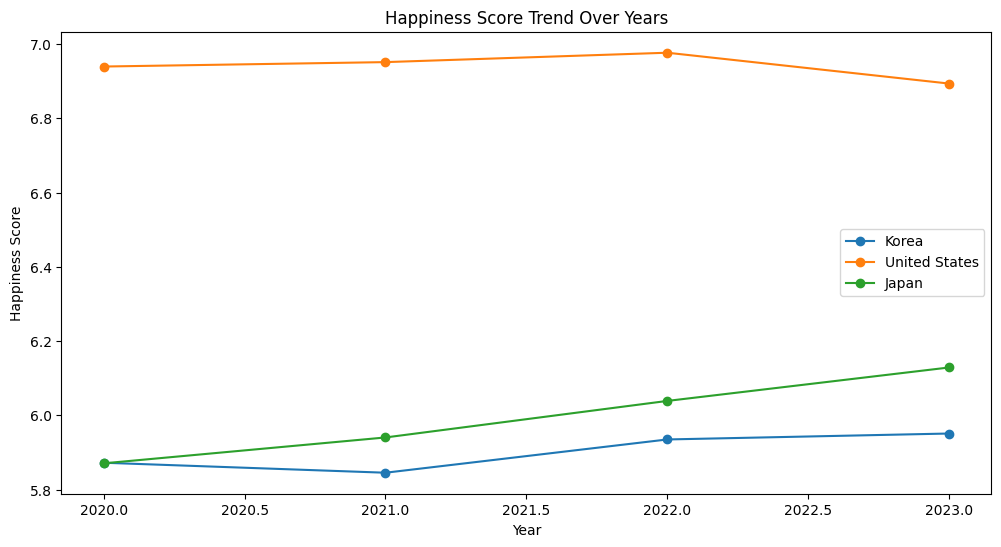

In [ ]:
import pandas as pd

# 특정 국가 예시 (한국, 미국, 일본)
countries = ["Korea", "United States", "Japan"]
df_filtered = df[df["Country_name"].isin(countries)]

plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_filtered[df_filtered["Country_name"] == country]
    plt.plot(subset["year"], subset["Ladder_score"], marker="o", label=country)

plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score Trend Over Years")
plt.legend()
plt.show()

In [ ]:
# 중요 행복 요인 선택
columns = ["Social_support", "Healthy_life_expectancy", "Freedom_to_make_life_choices",
           "Generosity", "Perceptions_of_corruption"]

df_top10 = df.nlargest(10, "Ladder_score")  # 상위 10개국 선택
df_top10.set_index("Country_name")[columns].plot(kind="bar", stacked=True, figsize=(12, 6))

plt.title("Factors Contributing to Happiness Score (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Contribution to Happiness")
plt.legend(title="Factors")
plt.show()

KeyError: "None of [Index(['Social_support', 'Healthy_life_expectancy',\n       'Freedom_to_make_life_choices', 'Generosity',\n       'Perceptions_of_corruption'],\n      dtype='object')] are in the [columns]"

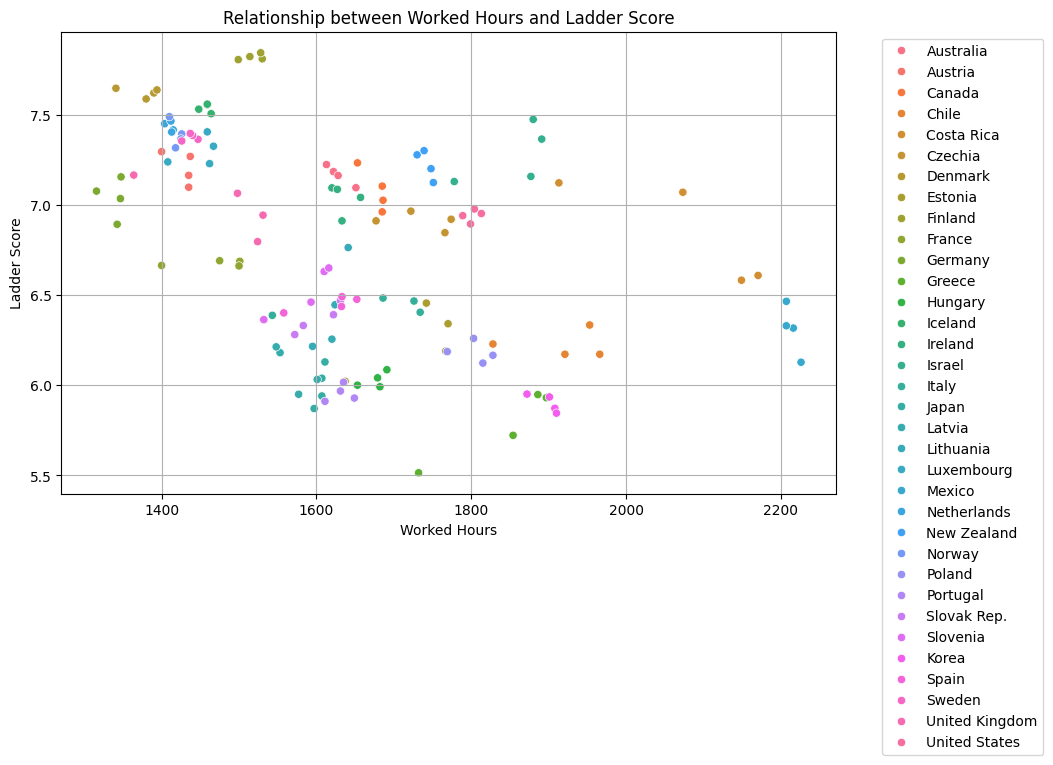

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='worked hour', y='Ladder score', hue='Country name')
plt.title('Relationship between Worked Hours and Ladder Score')
plt.xlabel('Worked Hours')
plt.ylabel('Ladder Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [ ]:
# 상관계수 계산
correlation = filtered_data['worked hour'].corr(filtered_data['Ladder score'])
print(f'Correlation between Worked Hours and Ladder Score: {correlation}')

Correlation between Worked Hours and Ladder Score: -0.47636524172397476


In [ ]:
!pip install pandas numpy statsmodels seaborn

# 라이브러리 불러오기
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/노동시간+행복지수.csv", encoding='utf-8')

# 데이터 확인
print(df.head())

# 독립 변수 (노동시간 + Log GDP per capita)
X = df[['worked hour','Explained by: Log GDP per capita ','Explained by: Social support','Explained by: Healthy life expectancy']]
X = sm.add_constant(X)  # 절편 추가

# 종속 변수 (행복지수)
y = df['Ladder score ']

# 다중 회귀 분석 실행
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

# 예측값 추가 후 저장
df['Predicted Happiness'] = model.predict(X)
df.to_csv("predicted_data.csv", index=False)

# 시각화 (산점도 + 회귀선)
plt.figure(figsize=(8,6))
sns.regplot(x=df['worked hour'], y=df['Ladder Score'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Worked Hours")
plt.ylabel("Happiness Score")
plt.title("Worked Hours vs Happiness Score")
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(x=df['Log GDP per capita'], y=df['Ladder Score'], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Log GDP per capita vs Happiness Score")
plt.show()


  Country name     Regional indicator  year  Ladder score  upperwhisker  \
0    Australia  North America and ANZ  2020        7.2228      7.304808   
1    Australia  North America and ANZ  2021        7.1835      7.264684   
2    Australia  North America and ANZ  2022        7.1621      7.243522   
3    Australia  North America and ANZ  2023        7.0946      7.179957   
4      Austria         Western Europe  2020        7.2942      7.359596   

   lowerwhisker  Explained by: Log GDP per capita  \
0      7.140791                          1.310396   
1      7.102316                          1.453485   
2      7.080678                          1.899889   
3      7.009243                          1.898795   
4      7.228804                          1.317286   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.477146                               1.022608   
1                      1.075880                               0.800667   
2       

KeyError: "['Explained by: Log GDP per capita '] not in index"

In [ ]:
import pandas as pd
import glob

# csv파일을 데이터프레임으로 불러오기
work_hours_df = pd.read_csv("/content/2015.csv", encoding='utf-8')
work_hours_df2 = pd.read_csv("/content/2016.csv", encoding='utf-8')
work_hours_df3 = pd.read_csv("/content/2017.csv", encoding='utf-8')
work_hours_df4 = pd.read_csv("/content/2018.csv", encoding='utf-8')
work_hours_df5 = pd.read_csv("/content/2019.csv", encoding='utf-8')
work_hours_df6 = pd.read_csv("/content/2020.csv", encoding='utf-8')
work_hours_df7 = pd.read_csv("/content/2021.csv", encoding='utf-8')
work_hours_df8 = pd.read_csv("/content/2022.csv", encoding='utf-8')
work_hours_df9 = pd.read_csv("/content/2023.csv", encoding='utf-8')

In [ ]:
merged_df

,Country name,Regional indicator,year,Ladder score_x,Ladder score_y
0,Afghanistan,South Asia,2020,2.5669,3.575
1,Afghanistan,South Asia,2021,2.5229,3.575
2,Afghanistan,South Asia,2022,2.4038,3.575
3,Afghanistan,South Asia,2023,1.8590,3.575
4,Afghanistan,South Asia,2024,1.7210,3.575
...,...,...,...,...,...
625,Zimbabwe,Sub-Saharan Africa,2020,3.2992,4.610
626,Zimbabwe,Sub-Saharan Africa,2021,3.1448,4.610
627,Zimbabwe,Sub-Saharan Africa,2022,2.9951,4.610
628,Zimbabwe,Sub-Saharan Africa,2023,3.2035,4.610


In [ ]:
work_hours_df['year']='2015'
work_hours_df2['year']='2016'
work_hours_df3['year']='2017'
work_hours_df4['year']='2018'
work_hours_df5['year']='2019'
work_hours_df6['year']='2020'
work_hours_df7['year']='2021'
work_hours_df8['year']='2022'
work_hours_df9['year']='2023'


In [ ]:
work_hours_df

,Category,Gender wage gap,year
0,Korea,37.176282,2015
1,Japan,25.731790,2015
2,Israel,20.439189,2015
3,United States,18.882682,2015
4,Canada,18.653846,2015
5,Finland,18.055981,2015
6,United Kingdom,17.101551,2015
7,Austria,17.043253,2015
8,Mexico,16.666667,2015
9,Czechia,16.455154,2015


In [ ]:
work_hours_df=work_hours_df.rename(columns={'Country': 'Country name', 'Region': 'Regional indicator', 'Happiness Score': 'Ladder score'})

In [ ]:
merged_df = pd.merge(happiness_df,work_hours_df , on='Country name', how='inner')

In [ ]:
merged_df

,Country name,Regional indicator,year_x,Ladder score_x,Ladder score_y,year_y
0,Afghanistan,South Asia,2020,2.5669,3.575,2015
1,Afghanistan,South Asia,2021,2.5229,3.575,2015
2,Afghanistan,South Asia,2022,2.4038,3.575,2015
3,Afghanistan,South Asia,2023,1.8590,3.575,2015
4,Afghanistan,South Asia,2024,1.7210,3.575,2015
...,...,...,...,...,...,...
625,Zimbabwe,Sub-Saharan Africa,2020,3.2992,4.610,2015
626,Zimbabwe,Sub-Saharan Africa,2021,3.1448,4.610,2015
627,Zimbabwe,Sub-Saharan Africa,2022,2.9951,4.610,2015
628,Zimbabwe,Sub-Saharan Africa,2023,3.2035,4.610,2015


In [ ]:
happiness_df

,Country name,Regional indicator,year,Ladder score
0,Afghanistan,South Asia,2020,2.5669
1,Afghanistan,South Asia,2021,2.5229
2,Afghanistan,South Asia,2022,2.4038
3,Afghanistan,South Asia,2023,1.8590
4,Afghanistan,South Asia,2024,1.7210
...,...,...,...,...
655,Zimbabwe,Sub-Saharan Africa,2020,3.2992
656,Zimbabwe,Sub-Saharan Africa,2021,3.1448
657,Zimbabwe,Sub-Saharan Africa,2022,2.9951
658,Zimbabwe,Sub-Saharan Africa,2023,3.2035


In [ ]:
work_hours_df

,Country name,Ladder score,year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
...,...,...,...
153,Rwanda,3.465,2015
154,Benin,3.340,2015
155,Syria,3.006,2015
156,Burundi,2.905,2015


In [ ]:
final_df = pd.concat([work_hours_df, work_hours_df2], ignore_index=True)
final_df2 = pd.concat([final_df , work_hours_df3], ignore_index=True)
final_df3 = pd.concat([final_df2 , work_hours_df4], ignore_index=True)
final_df4 = pd.concat([final_df3 , work_hours_df5], ignore_index=True)
final_df5 = pd.concat([final_df4 , work_hours_df6], ignore_index=True)
final_df6 = pd.concat([final_df5, work_hours_df7], ignore_index=True)
final_df7 = pd.concat([final_df6 , work_hours_df8], ignore_index=True)
final_df8 = pd.concat([final_df7 , work_hours_df9], ignore_index=True)


In [ ]:
final_df8.to_csv('/content/final3.df.csv', index=False)

In [ ]:
# 필요한 열 선택
ladder_x = merged_df[['Country name', 'Regional indicator', 'year_x', 'Ladder score_x']]
ladder_y = merged_df[['Country name', 'Regional indicator', 'year_y', 'Ladder score_y']]

# 열 이름 변경
ladder_x.columns = ['Country name', 'Regional indicator', 'year', 'Ladder score']
ladder_y.columns = ['Country name', 'Regional indicator', 'year', 'Ladder score']

# year_y와 Ladder score_y의 데이터프레임을 만들고, year은 2015로 설정
ladder_y['year'] = 2015
ladder_y['Ladder score'] = ladder_y['Ladder score']

# 세로로 결합
final_df = pd.concat([ladder_x, ladder_y], ignore_index=True)

# 결과 확인
print("\nFinal Concatenated DataFrame:")
print(final_df)



Final Concatenated DataFrame:
     Country name  Regional indicator  year  Ladder score
0     Afghanistan          South Asia  2020        2.5669
1     Afghanistan          South Asia  2021        2.5229
2     Afghanistan          South Asia  2022        2.4038
3     Afghanistan          South Asia  2023        1.8590
4     Afghanistan          South Asia  2024        1.7210
...           ...                 ...   ...           ...
1255     Zimbabwe  Sub-Saharan Africa  2015        4.6100
1256     Zimbabwe  Sub-Saharan Africa  2015        4.6100
1257     Zimbabwe  Sub-Saharan Africa  2015        4.6100
1258     Zimbabwe  Sub-Saharan Africa  2015        4.6100
1259     Zimbabwe  Sub-Saharan Africa  2015        4.6100

[1260 rows x 4 columns]


<ipython-input-45-165b0a9f302b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladder_y['year'] = 2015
<ipython-input-45-165b0a9f302b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladder_y['Ladder score'] = ladder_y['Ladder score']


In [ ]:
# 1. 같은 나라의 'Regional indicator' 채우기 (앞에서 채우기)
final_df5['Regional indicator'] = final_df5.groupby('Country name')['Regional indicator'].fillna(method='ffill')

# 2. 연도 기준 오름차순 정렬
final_df5 = final_df5.sort_values(by=['Country name', 'year']).reset_index(drop=True)

# 결과 출력
print(final_df5)

     Country name  Regional indicator  year  Ladder score
0     Afghanistan          South Asia  2020        2.5669
1     Afghanistan          South Asia  2021        2.5229
2     Afghanistan          South Asia  2022        2.4038
3     Afghanistan          South Asia  2023        1.8590
4     Afghanistan          South Asia  2024        1.7210
...           ...                 ...   ...           ...
1437     Zimbabwe  Sub-Saharan Africa  2015        4.6100
1438     Zimbabwe  Sub-Saharan Africa  2016        4.1930
1439     Zimbabwe  Sub-Saharan Africa  2017        3.8750
1440     Zimbabwe  Sub-Saharan Africa  2018        3.6920
1441     Zimbabwe  Sub-Saharan Africa  2019        3.6630

[1442 rows x 4 columns]


<ipython-input-63-385bc8b63730>:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  final_df5['Regional indicator'] = final_df5.groupby('Country name')['Regional indicator'].fillna(method='ffill')
<ipython-input-63-385bc8b63730>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df5['Regional indicator'] = final_df5.groupby('Country name')['Regional indicator'].fillna(method='ffill')
<ipython-input-63-385bc8b63730>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df5['Regional indicator'] = fi

In [ ]:
final_df5.to_csv('/content/final2.df.csv', index=False)

In [ ]:
final_df5['year']

,year
0,2020
1,2021
2,2022
3,2023
4,2024
...,...
1437,2015
1438,2016
1439,2017
1440,2018


In [ ]:
final_df5 = final_df5.sort_values(by=['Country name', 'year']).reset_index(drop=True)

In [ ]:
final_df5.to_csv('/content/final2.df.csv', index=False)

In [ ]:
df = pd.read_csv("/content/final2.df.csv", encoding='utf-8')

In [ ]:
df = df.sort_values(by=['Country name', 'year']).reset_index(drop=True)

In [ ]:
df.to_csv("happiness_data_sorted.csv", index=False)

In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("/content/happiness_data_sorted.csv",encoding='utf-8')  # 파일명 확인 필요

# Regional indicator'가 NaN인 행 삭제
df = df.dropna(subset=['Regional indicator'])

# 나라별 + 연도별로 정렬
df = df.sort_values(by=['Country name', 'year']).reset_index(drop=True)

#  정렬된 데이터 저장
df.to_csv("happiness_data_sorted2.csv", index=False)

In [ ]:
df =  pd.read_csv("/content/2015~2023 행복+노동 OECD.csv", encoding='utf-8')

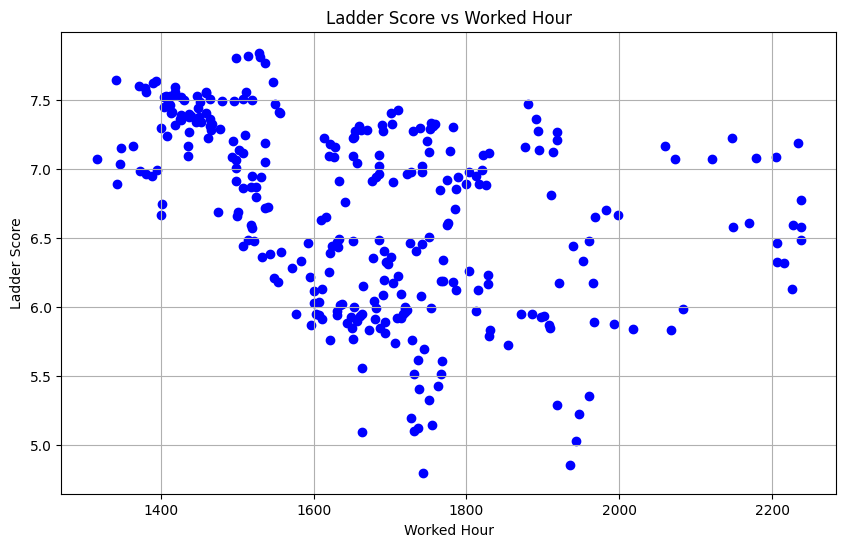

Ladder Score와 Worked Hour의 상관계수: -0.40255704300216105


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df['worked hour'], df['Ladder score'], color='blue', marker='o')

# 제목 및 레이블 추가
plt.title('Ladder Score vs Worked Hour')
plt.xlabel('Worked Hour')
plt.ylabel('Ladder Score')

# 그리드 추가
plt.grid()

# 결과 보여주기
plt.show()
# 상관계수 계산
correlation = df['Ladder score'].corr(df['worked hour'])

# 결과 출력
print(f'Ladder Score와 Worked Hour의 상관계수: {correlation}')

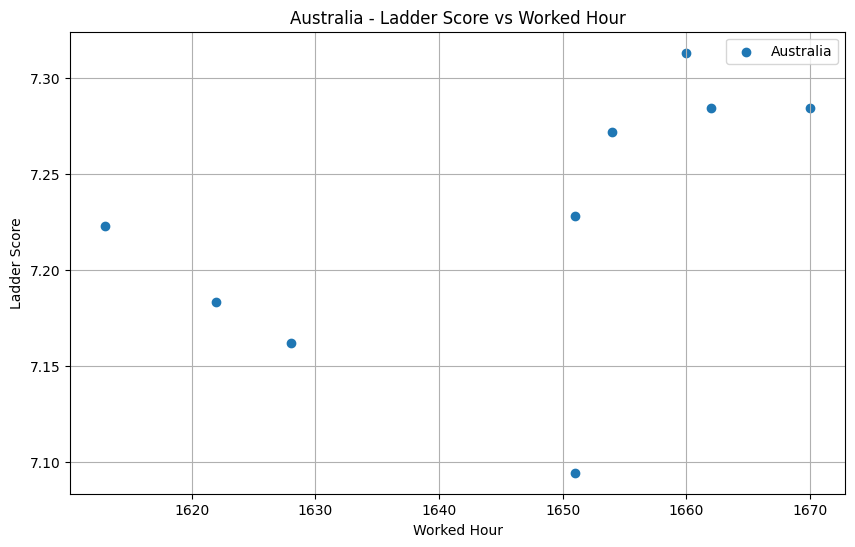

Australia의 Ladder Score와 Worked Hour의 상관계수: 0.49762359260230743


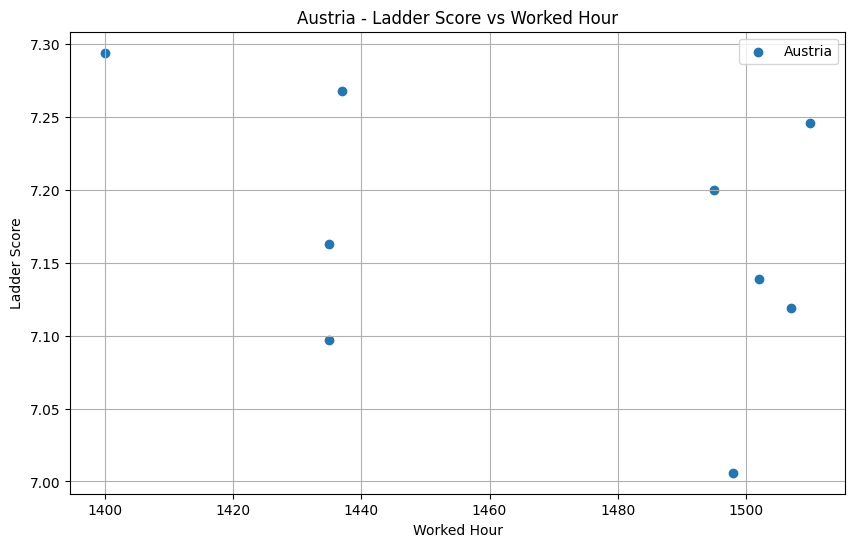

Austria의 Ladder Score와 Worked Hour의 상관계수: -0.41943260198781995


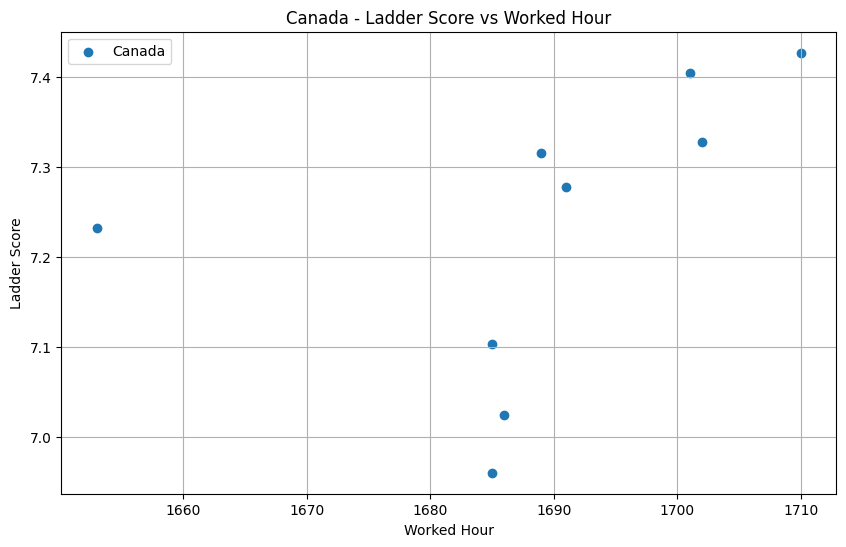

Canada의 Ladder Score와 Worked Hour의 상관계수: 0.4537396909759188


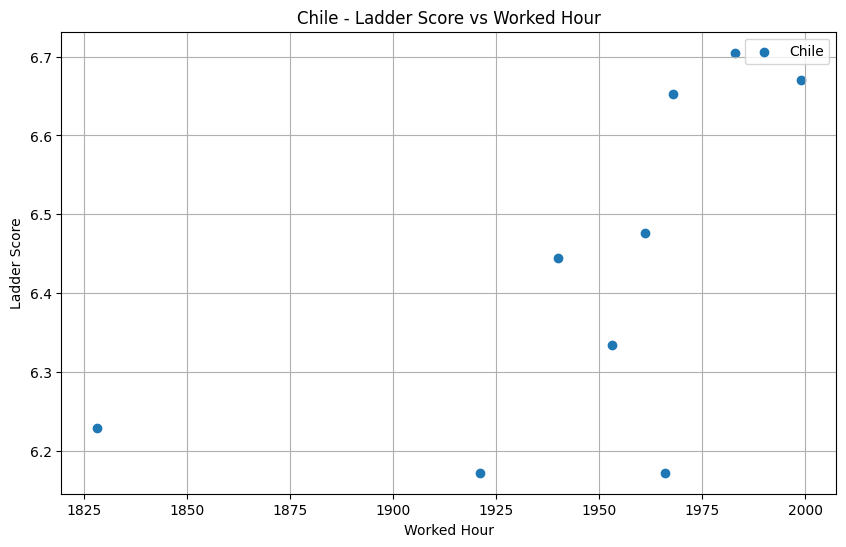

Chile의 Ladder Score와 Worked Hour의 상관계수: 0.616618254808015


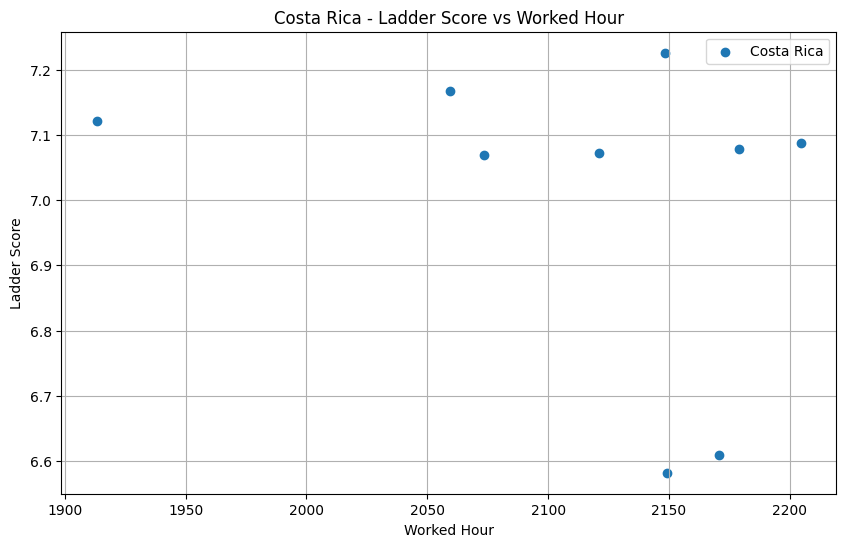

Costa Rica의 Ladder Score와 Worked Hour의 상관계수: -0.309037405309738


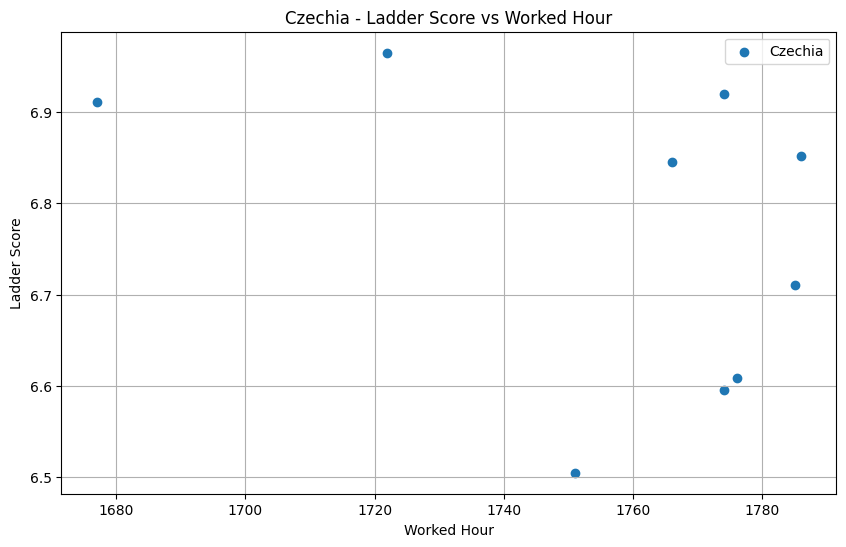

Czechia의 Ladder Score와 Worked Hour의 상관계수: -0.3877971235563579


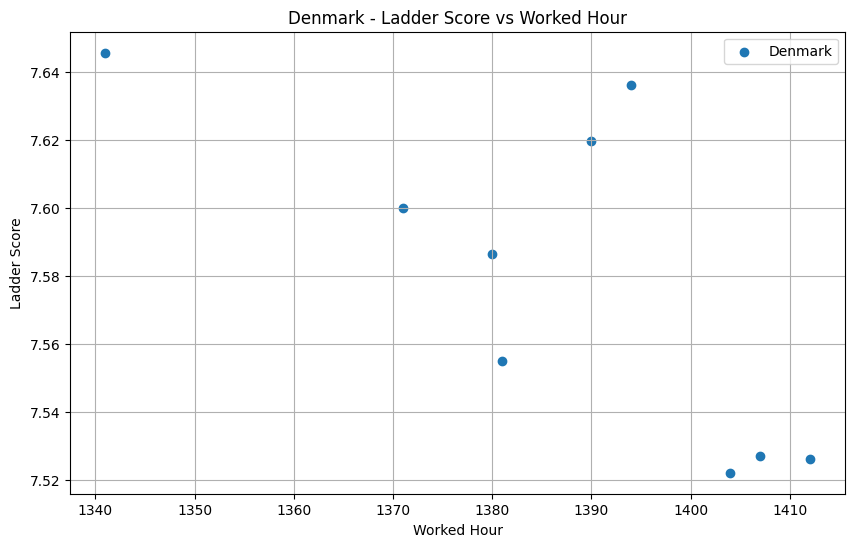

Denmark의 Ladder Score와 Worked Hour의 상관계수: -0.7139820343900196


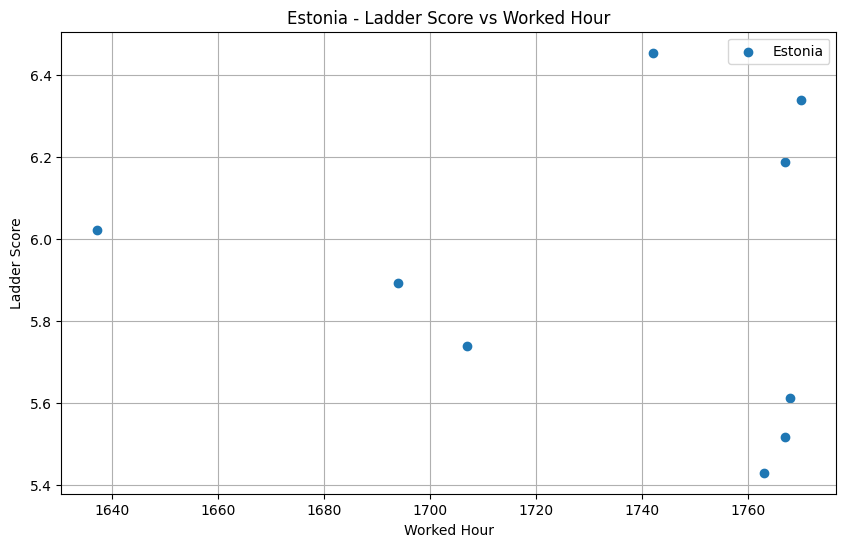

Estonia의 Ladder Score와 Worked Hour의 상관계수: -0.09945477388916824


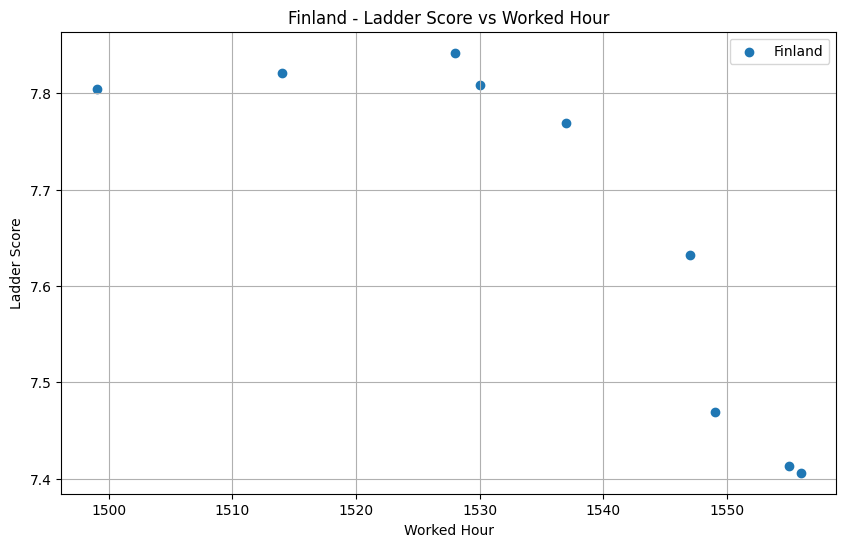

Finland의 Ladder Score와 Worked Hour의 상관계수: -0.8217900912505045


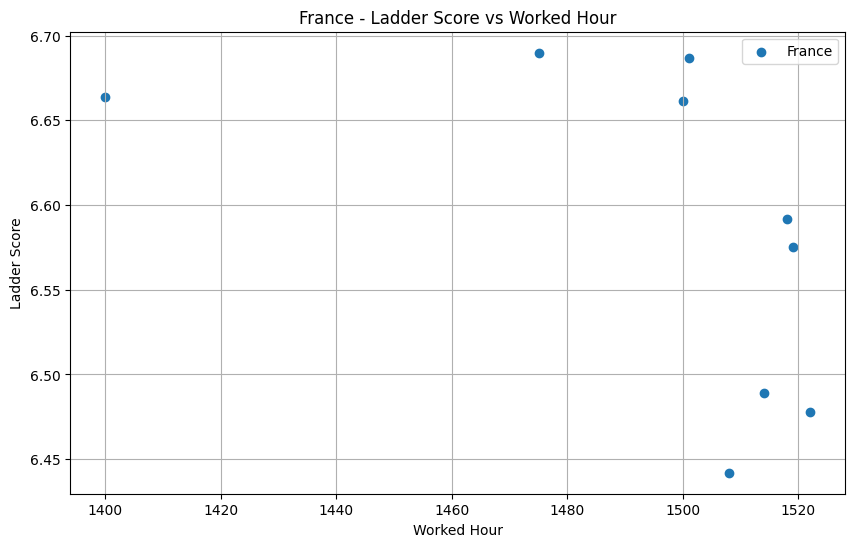

France의 Ladder Score와 Worked Hour의 상관계수: -0.5127092072566223


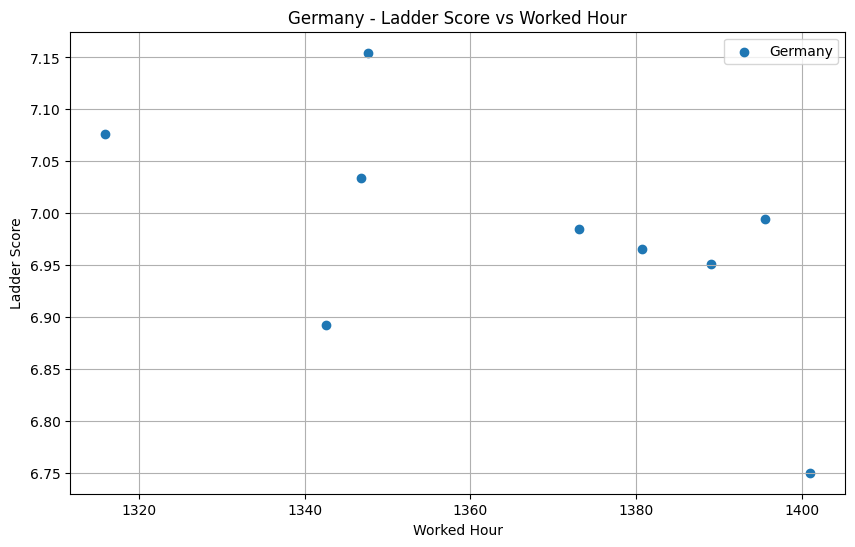

Germany의 Ladder Score와 Worked Hour의 상관계수: -0.5865427509402316


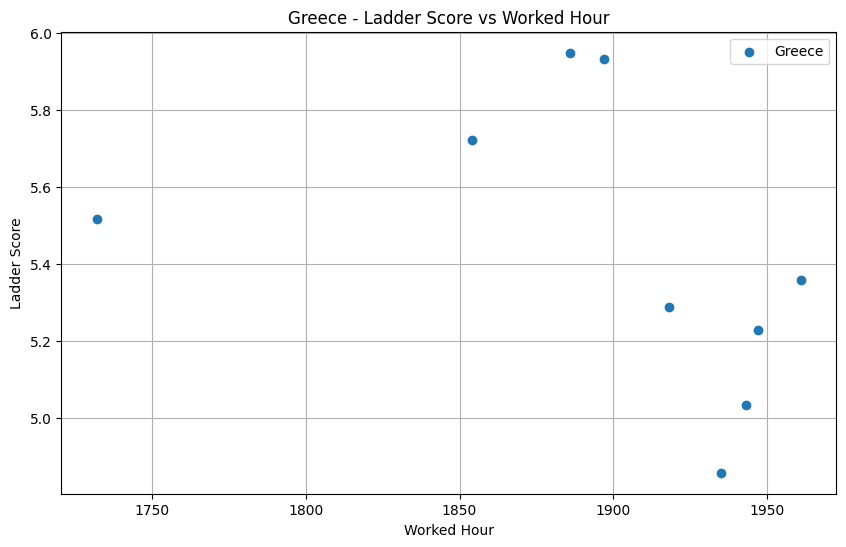

Greece의 Ladder Score와 Worked Hour의 상관계수: -0.4184802267767825


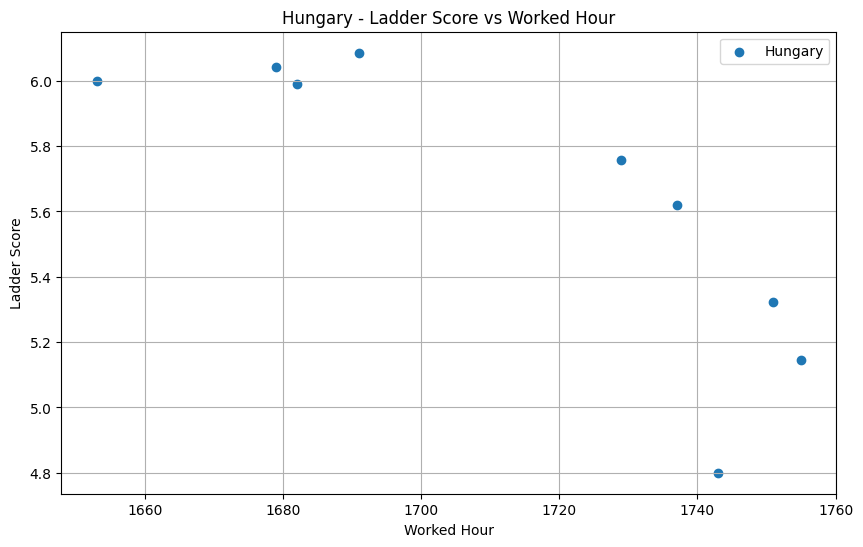

Hungary의 Ladder Score와 Worked Hour의 상관계수: -0.8232972572848569


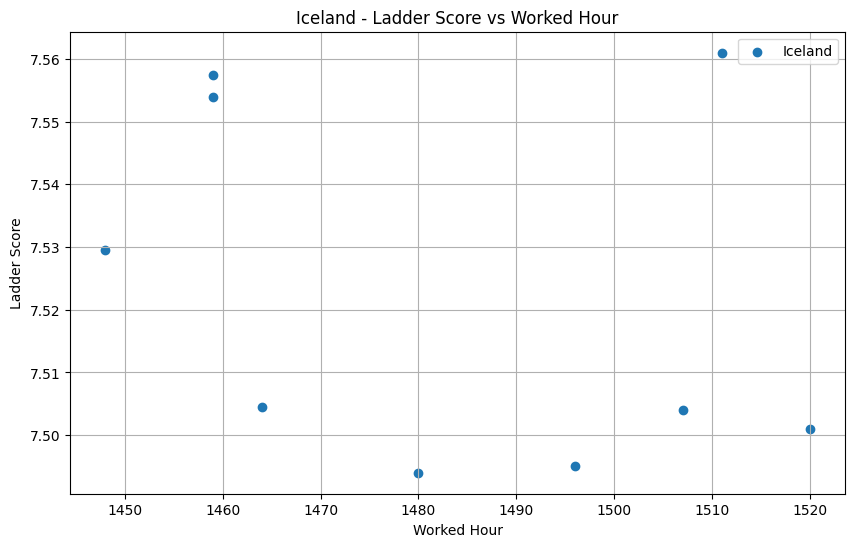

Iceland의 Ladder Score와 Worked Hour의 상관계수: -0.3208283120428195


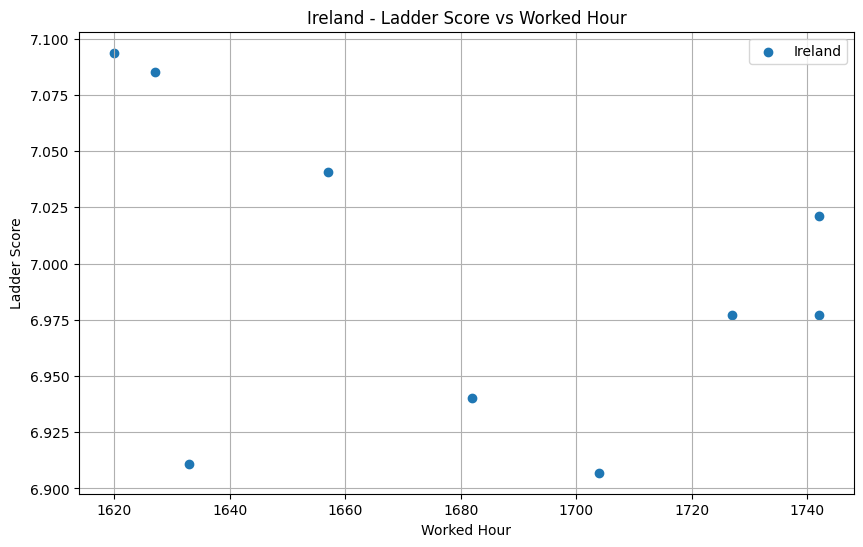

Ireland의 Ladder Score와 Worked Hour의 상관계수: -0.37429105398929313


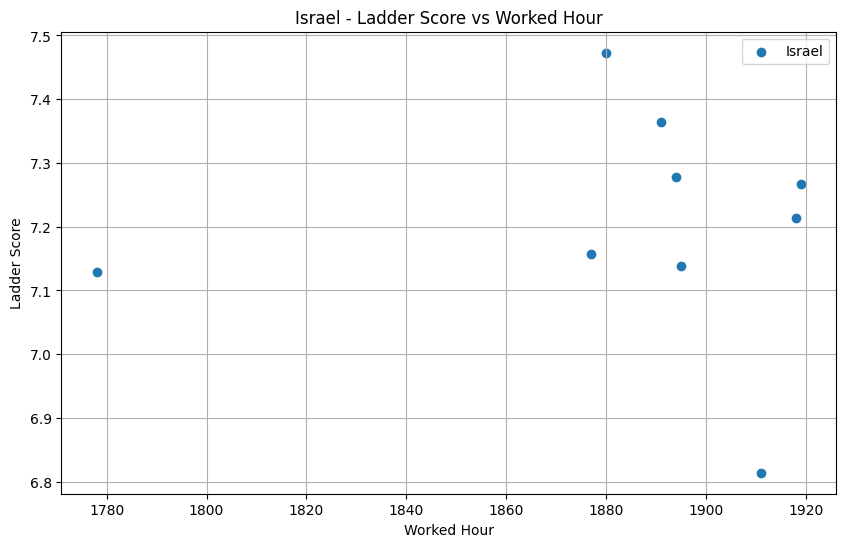

Israel의 Ladder Score와 Worked Hour의 상관계수: 0.0058877690266816735


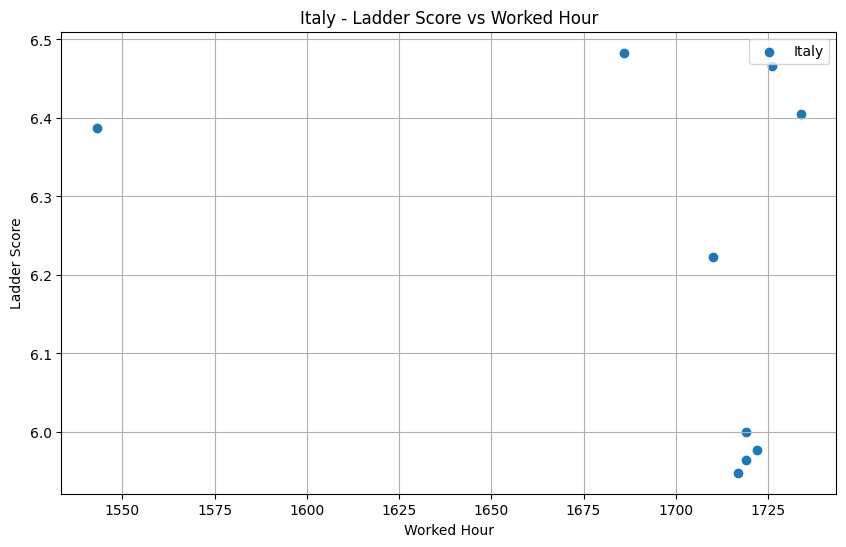

Italy의 Ladder Score와 Worked Hour의 상관계수: -0.32950786750904104


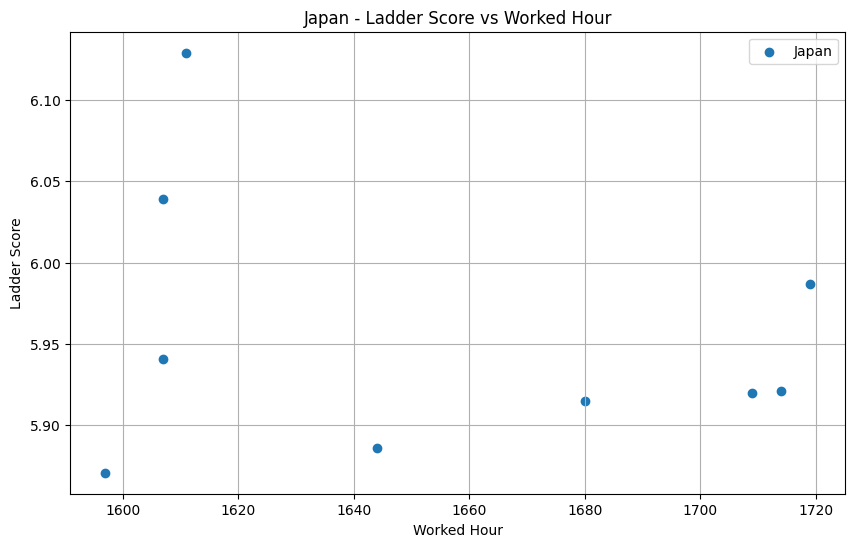

Japan의 Ladder Score와 Worked Hour의 상관계수: -0.24135778145841938


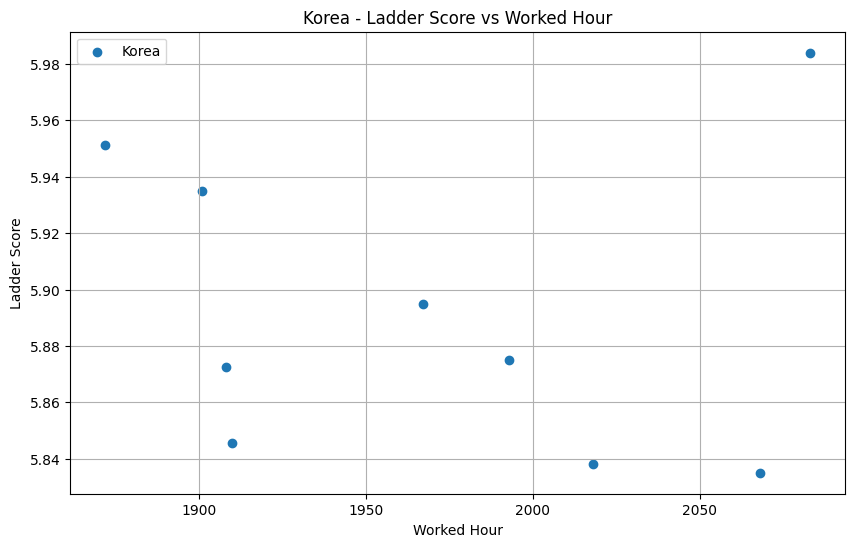

Korea의 Ladder Score와 Worked Hour의 상관계수: -0.0897250073394213


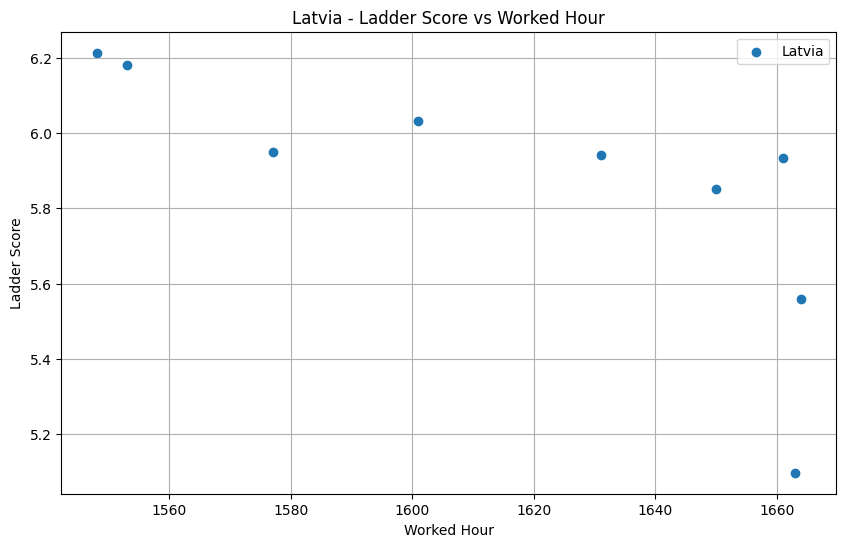

Latvia의 Ladder Score와 Worked Hour의 상관계수: -0.7325913105905547


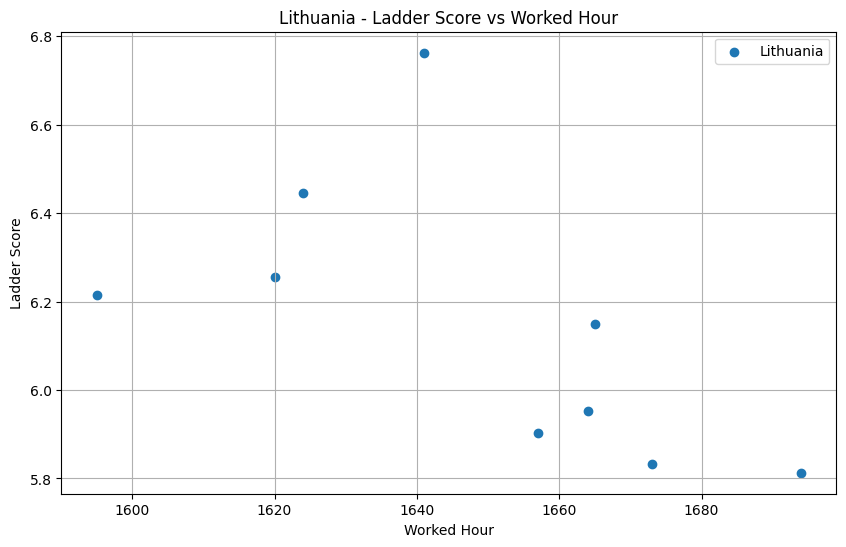

Lithuania의 Ladder Score와 Worked Hour의 상관계수: -0.6014030322093162


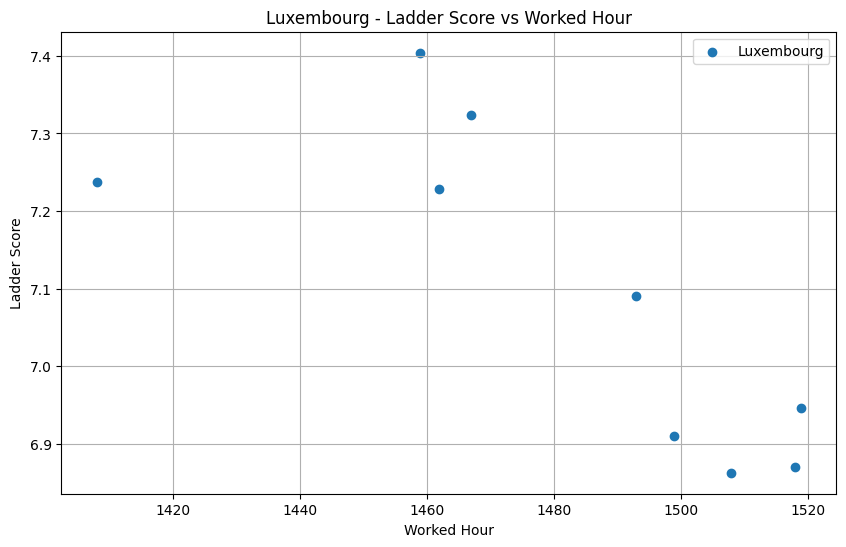

Luxembourg의 Ladder Score와 Worked Hour의 상관계수: -0.7762676780367896


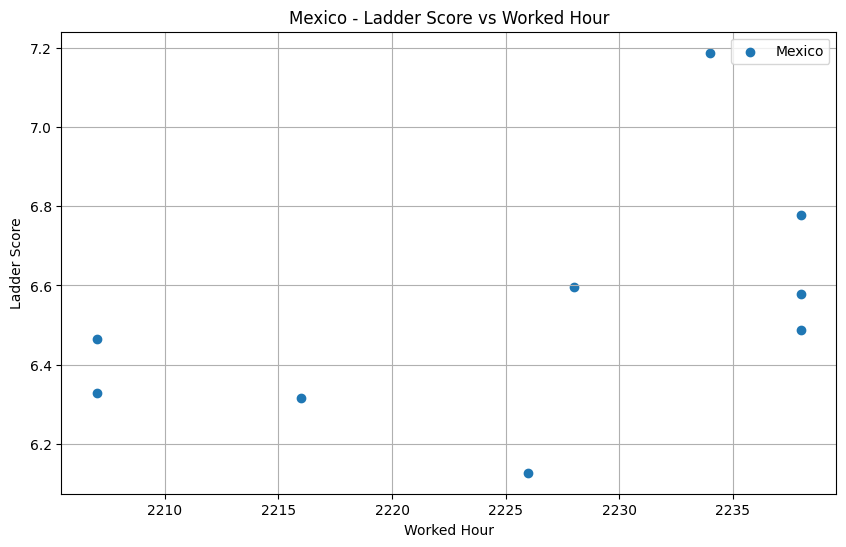

Mexico의 Ladder Score와 Worked Hour의 상관계수: 0.495768633400987


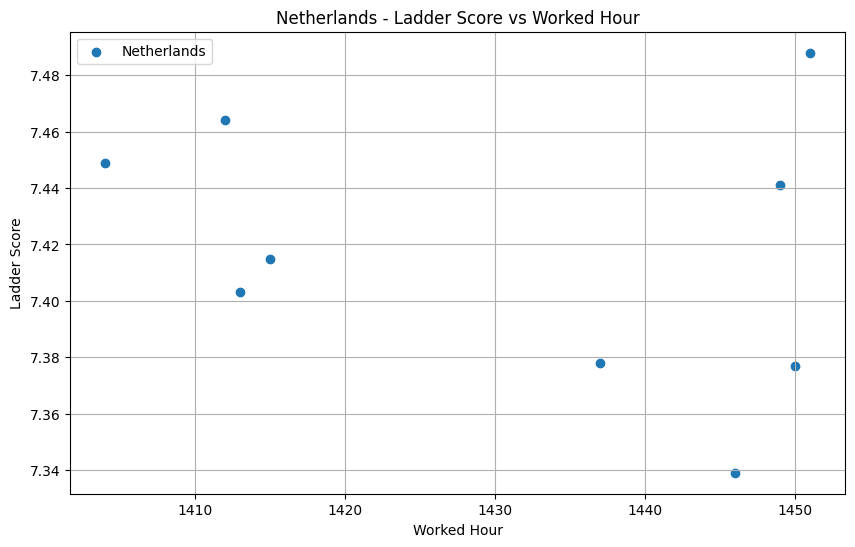

Netherlands의 Ladder Score와 Worked Hour의 상관계수: -0.2400192995058834


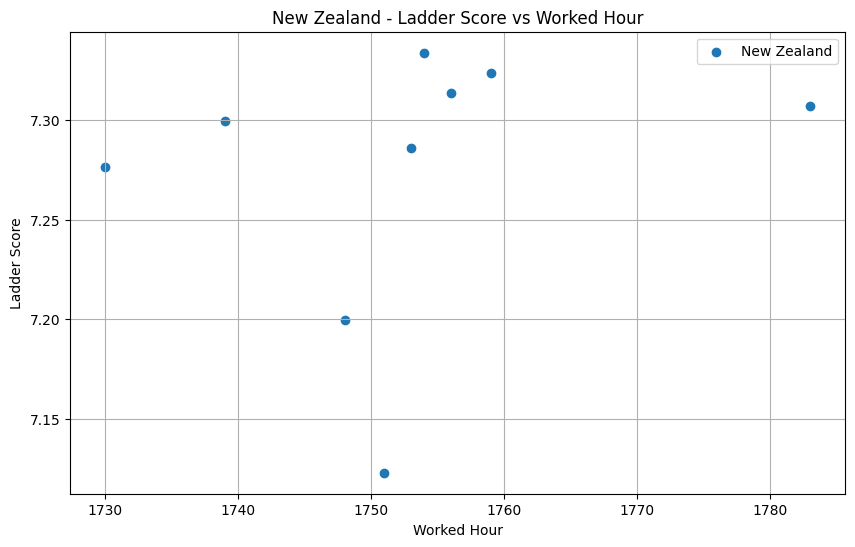

New Zealand의 Ladder Score와 Worked Hour의 상관계수: 0.21481132048570264


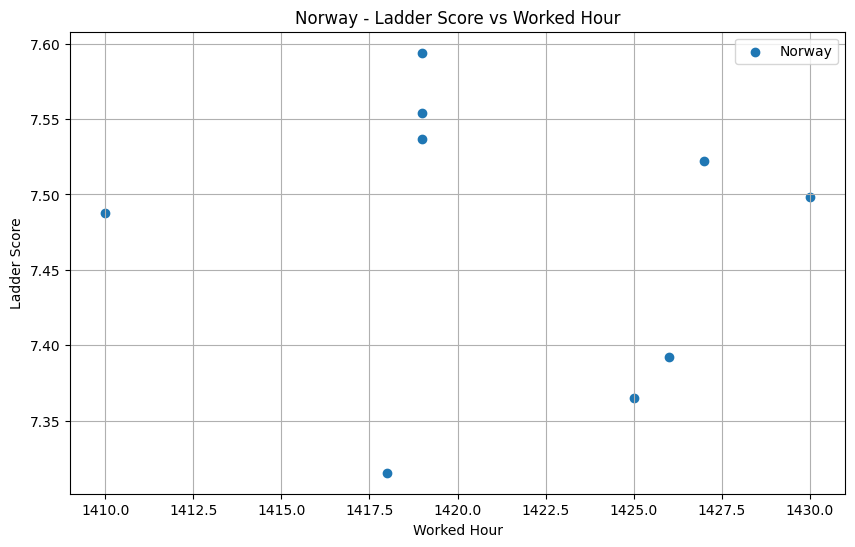

Norway의 Ladder Score와 Worked Hour의 상관계수: -0.1177568393979845


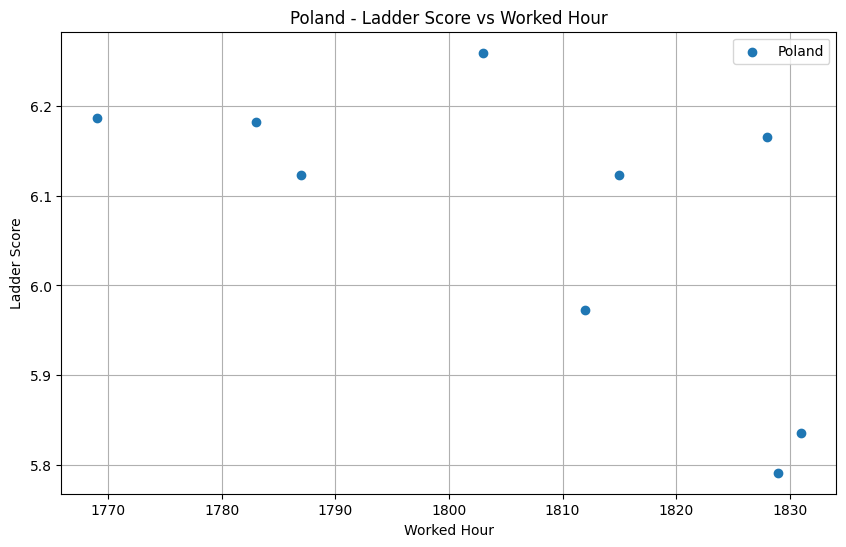

Poland의 Ladder Score와 Worked Hour의 상관계수: -0.63101518213089


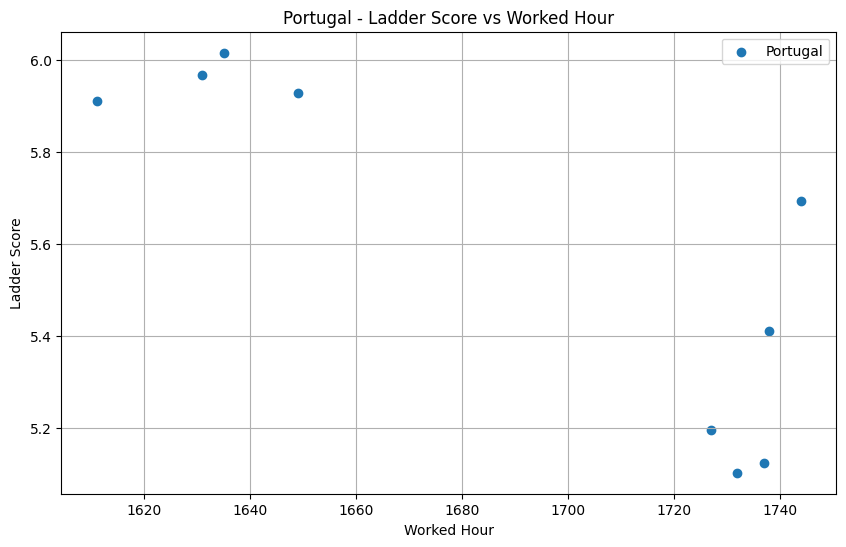

Portugal의 Ladder Score와 Worked Hour의 상관계수: -0.8388680199440547


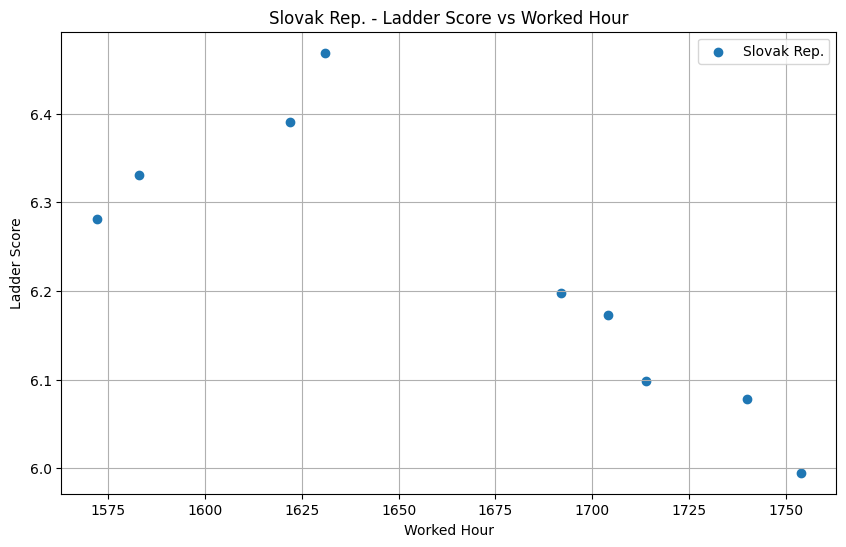

Slovak Rep.의 Ladder Score와 Worked Hour의 상관계수: -0.8259087241533363


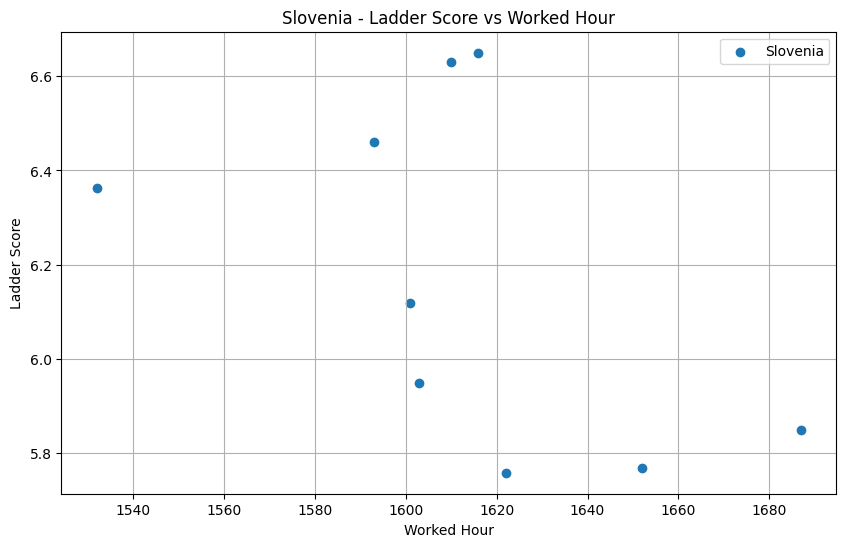

Slovenia의 Ladder Score와 Worked Hour의 상관계수: -0.5040158303269071


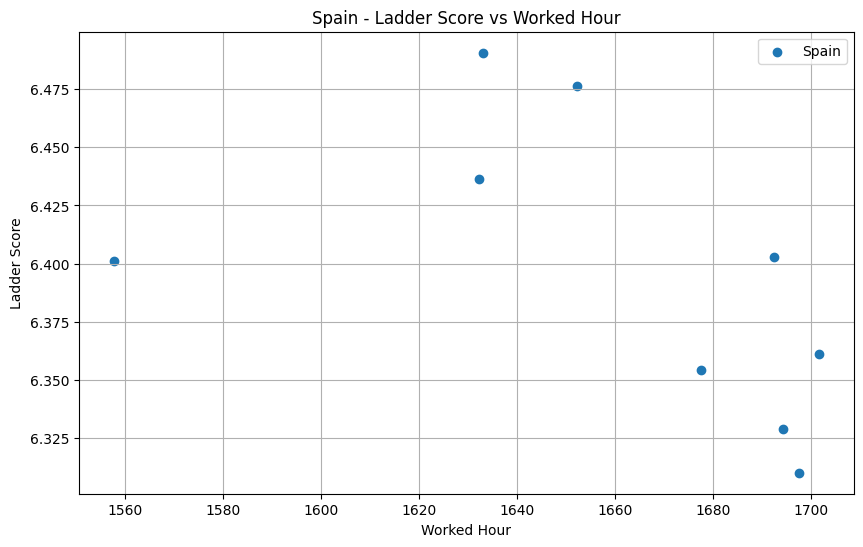

Spain의 Ladder Score와 Worked Hour의 상관계수: -0.516852068958643


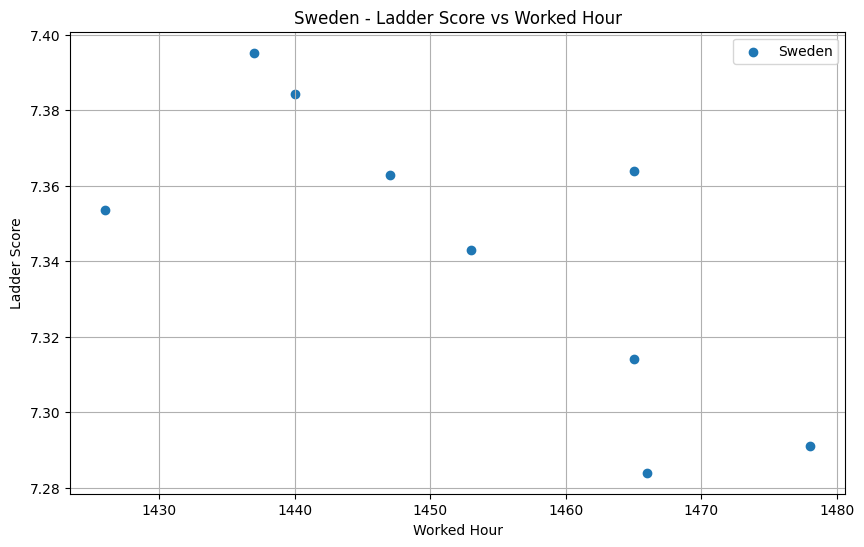

Sweden의 Ladder Score와 Worked Hour의 상관계수: -0.7418965477243055


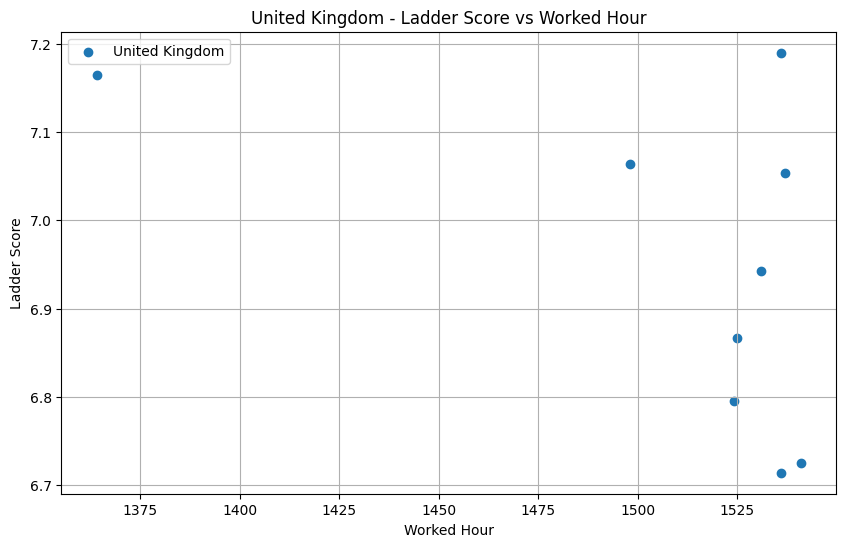

United Kingdom의 Ladder Score와 Worked Hour의 상관계수: -0.4921996269222363


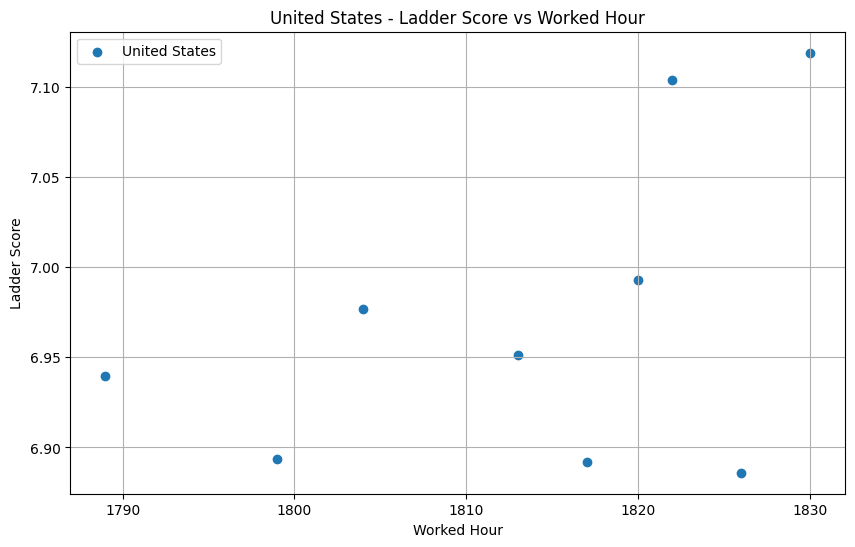

United States의 Ladder Score와 Worked Hour의 상관계수: 0.4486274866578175


In [ ]:
# 국가별로 그룹화하여 분석
countries = df['Country name'].unique()

for country in countries:
    country_data = df[df['Country name'] == country]

    # 산점도 그리기
    plt.figure(figsize=(10, 6))
    plt.scatter(country_data['worked hour'], country_data['Ladder score'], label=country, marker='o')

    # 제목 및 레이블 추가
    plt.title(f'{country} - Ladder Score vs Worked Hour')
    plt.xlabel('Worked Hour')
    plt.ylabel('Ladder Score')
    plt.grid()
    plt.legend()
    plt.show()

    # 상관계수 계산
    correlation = country_data['Ladder score'].corr(country_data['worked hour'])
    print(f'{country}의 Ladder Score와 Worked Hour의 상관계수: {correlation}')

In [ ]:
# 상관계수를 저장할 딕셔너리
correlation_results = {}

# 국가별로 그룹화하여 분석
countries = df['Country name'].unique()

for country in countries:
    country_data = df[df['Country name'] == country]

    # 상관계수 계산
    correlation = country_data['Ladder score'].corr(country_data['worked hour'])

    # 상관계수가 0.7 이상인 경우만 저장
    if abs(correlation) >= 0.7:
        correlation_results[country] = correlation

# 결과 출력
for country, correlation in correlation_results.items():
    print(f'{country}의 Ladder Score와 Worked Hour의 상관계수: {correlation}')


Denmark의 Ladder Score와 Worked Hour의 상관계수: -0.7139820343900196
Finland의 Ladder Score와 Worked Hour의 상관계수: -0.8217900912505045
Hungary의 Ladder Score와 Worked Hour의 상관계수: -0.8232972572848569
Latvia의 Ladder Score와 Worked Hour의 상관계수: -0.7325913105905547
Luxembourg의 Ladder Score와 Worked Hour의 상관계수: -0.7762676780367896
Portugal의 Ladder Score와 Worked Hour의 상관계수: -0.8388680199440547
Slovak Rep.의 Ladder Score와 Worked Hour의 상관계수: -0.8259087241533363
Sweden의 Ladder Score와 Worked Hour의 상관계수: -0.7418965477243055


In [ ]:
import pandas as pd
df = pd.read_csv("/content/GDP_GROWTH.csv",encoding='utf-8')  # 파일명 확인 필요

# 데이터를 긴 형식으로 변환
melted_gdp_growth_df = df.melt(id_vars=['Country Name', 'Indicator Name'],
                                            var_name='year',
                                            value_name='GDP Growth (%)')

# 연도 열을 정수형으로 변환
melted_gdp_growth_df['year'] = melted_gdp_growth_df['year'].astype(int)

In [ ]:
melted_gdp_growth_df.to_csv("glow.csv", index=False)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/GDP.csv",encoding='utf-8')  # 파일명 확인 필요

# 데이터를 긴 형식으로 변환
melted_gdp_growth_df = df.melt(id_vars=['Country Name', 'Indicator Name'],
                                            var_name='year',
                                            value_name='GDP')

# 연도 열을 정수형으로 변환
melted_gdp_growth_df['year'] = melted_gdp_growth_df['year'].astype(int)

In [ ]:
melted_gdp_growth_df.to_csv("gdp.csv", index=False)

In [ ]:
df1 = pd.read_csv("/content/gdp.csv",encoding='utf-8')
df2 = pd.read_csv("/content/glow.csv",encoding='utf-8')

In [ ]:
merged_df = pd.merge(df1, df2, on=['Country Name', 'year'], how='left')

In [ ]:
merged_df

,Country Name,year,GDP,GDP Growth (%)
0,Aruba,2015,2.962907e+09,-0.623626
1,Africa Eastern and Southern,2015,8.982800e+11,3.004937
2,Afghanistan,2015,1.913422e+10,1.451315
3,Africa Western and Central,2015,7.717700e+11,2.720365
4,Angola,2015,9.049642e+10,0.943572
...,...,...,...,...
2389,Kosovo,2023,8.586233e+09,4.067627
2390,"Yemen, Rep.",2023,NaN,NaN
2391,South Africa,2023,3.633100e+11,0.698485
2392,Zambia,2023,2.758070e+10,5.367943


In [ ]:
# 중복값 제거
merged_df = merged_df.drop_duplicates()

# null 값 제거
merged_df = merged_df.dropna()

In [ ]:
merged_df.to_csv("final.csv", index=False)

In [ ]:
df1 = pd.read_csv("/content/2015~2023 행복+노동 OECD.csv",encoding='utf-8')
df2 = pd.read_csv("/content/고용율.csv",encoding='utf-8')
df3 = pd.read_csv("/content/gdp+gdp glow.csv",encoding='utf-8')

In [ ]:
merged_df = pd.merge(df1, df2, on=['Country name', 'year'], how='left')
merged_df = pd.merge(merged_df, df3, on=['Country name', 'year'], how='left')

In [ ]:
work_hours_df.to_csv("hoo2.csv", index=False)

In [ ]:
df1 = pd.read_csv("/content/최종 (노동+행복,gdp,고용율).csv",encoding='utf-8')
df2 = pd.read_csv("/content/남여관계.csv",encoding='utf-8')

In [ ]:
merged_df = pd.merge(df1, df2, on=['Country name', 'year'], how='left')

In [ ]:
merged_df.to_csv("hoo3.csv", index=False)